In [2]:
import tensorflow as tf

# Download and load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Normalize the images to the range [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

print("Training data shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Test data shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 56s 0us/step
Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


In [4]:
import matplotlib.pyplot as plt

[6]


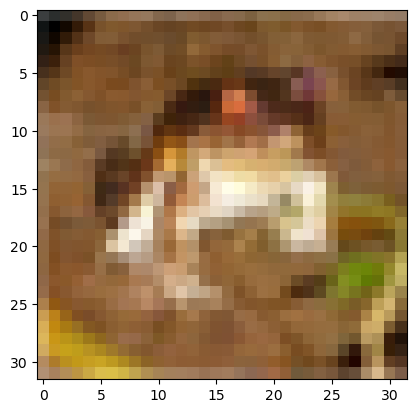

In [16]:
plt.imshow(train_images[0],cmap=plt.cm.Greys)
print(train_labels[0])

[9]


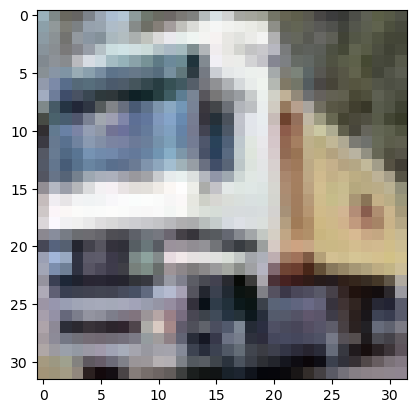

In [18]:
plt.imshow(train_images[1],cmap=plt.cm.Greys)
print(train_labels[1])

In [68]:
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.regularizers import l1
from tensorflow.keras.optimizers import Adam


In [54]:
# Building Model
input_shape = (32, 32, 3)
model = Sequential()
model.add(Flatten(input_shape = input_shape))
model.add(Dense(units=512, activation="relu", kernel_regularizer=l1(0.01)))
model.add(Dropout(rate=0.3))
model.add(Dense(units=252, activation="relu", kernel_regularizer=l1(0.01)))
model.add(Dropout(rate=0.3))
model.add(Dense(units=252, activation="relu", kernel_regularizer=l1(0.01)))
model.add(Dropout(rate=0.3))
model.add(Dense(units=64, activation="relu", kernel_regularizer=l1(0.01)))
model.add(Dropout(rate=0.3))
model.add(Dense(units=64, activation="relu", kernel_regularizer=l1(0.01)))
model.add(Dense(units=10, activation="softmax"))

model.summary()

C:\Users\rawat\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_9 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 252)                 │         129,276 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 252)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 252)                 │          63,756 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 252)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 64)                  │          16,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,050,066 (7.82 MB)

 Trainable params: 2,050,066 (7.82 MB)

 Non-trainable params: 0 (0.00 B)

In [56]:
model.compile(optimizer=Adam(learning_rate=0.002), loss='sparse_categorical_crossentropy', metrics=["accuracy"])

In [58]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Define the learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-6)

early_stop = EarlyStopping(monitor='val_loss',patience=10, verbose=1, min_delta=0.10)


In [60]:
# Fitting data  to the model
history = model.fit(train_images,train_labels, 
          validation_data=(test_images,test_labels),
          batch_size=20,epochs=50,
          callbacks=[lr_scheduler,early_stop],
          validation_batch_size=20)

Epoch 1/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 97s 35ms/step - accuracy: 0.1042 - loss: 23.1055 - val_accuracy: 0.1000 - val_loss: 7.3036 - learning_rate: 0.0020
Epoch 2/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 144s 36ms/step - accuracy: 0.1025 - loss: 7.3612 - val_accuracy: 0.1000 - val_loss: 7.3545 - learning_rate: 0.0020
Epoch 3/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 128s 30ms/step - accuracy: 0.0981 - loss: 7.3594 - val_accuracy: 0.1000 - val_loss: 7.3707 - learning_rate: 0.0020
Epoch 4/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 74s 30ms/step - accuracy: 0.0992 - loss: 7.3598 - val_accuracy: 0.1000 - val_loss: 7.3460 - learning_rate: 0.0020
Epoch 5/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 83s 30ms/step - accuracy: 0.0999 - loss: 7.3588 - val_accuracy: 0.1000 - val_loss: 7.2987 - learning_rate: 0.0020
Epoch 6/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 78s 31ms/step - accuracy: 0.0985 - loss: 7.3570 - val_accuracy: 0.1000 - val_loss: 7.3205 - learning_rate: 0.0020
Epoch 7/50
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 77s 31ms/step - acc

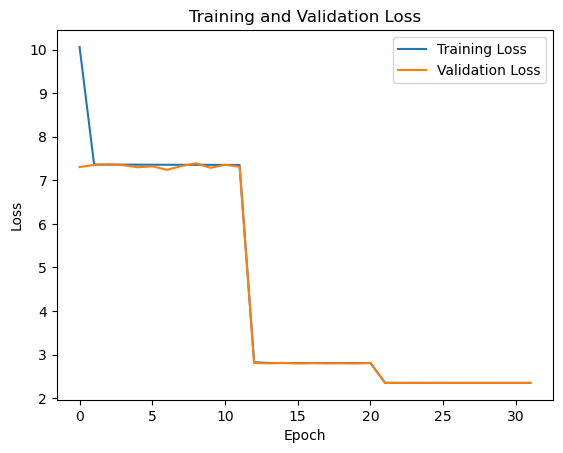

In [62]:
# Plot the training and validation loss 
plt.plot(history.history['loss'], label='Training Loss') 
plt.plot(history.history['val_loss'], label='Validation Loss') 
plt.xlabel('Epoch') 
plt.ylabel('Loss') 
plt.legend() 
plt.title('Training and Validation Loss') 
plt.show() 

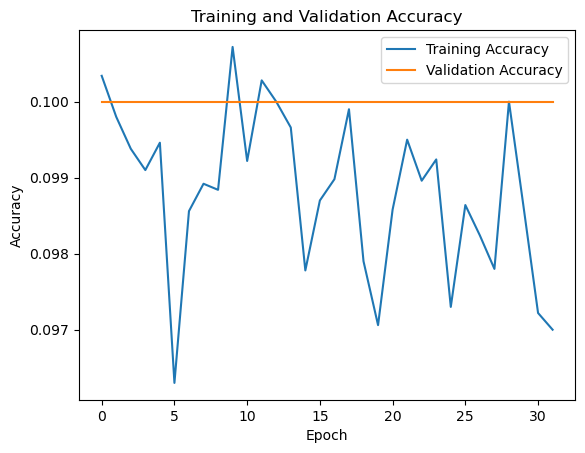

In [64]:
 #Plot the training and validation accuracy 
plt.plot(history.history['accuracy'], label='Training Accuracy') 
plt.plot(history.history['val_accuracy'], label='Validation Accuracy') 
plt.xlabel('Epoch') 
plt.ylabel('Accuracy') 
plt.legend() 
plt.title('Training and Validation Accuracy')
plt.show()

In [70]:
# Building Model
input_shape = (32, 32, 3)
model2 = Sequential()
model2.add(Flatten(input_shape = input_shape))
model2.add(Dense(units=512, activation="relu", kernel_regularizer=l1(0.01)))
model2.add(Dropout(rate=0.2))
model2.add(Dense(units=512, activation="relu", kernel_regularizer=l1(0.01)))
model2.add(Dropout(rate=0.2))
model2.add(BatchNormalization())
model2.add(Dense(units=252, activation="relu", kernel_regularizer=l1(0.01)))
model2.add(Dropout(rate=0.2))
model2.add(Dense(units=252, activation="relu", kernel_regularizer=l1(0.01)))
model2.add(Dropout(rate=0.2))
model2.add(BatchNormalization())
model2.add(Dense(units=64, activation="relu", kernel_regularizer=l1(0.01)))
model2.add(Dropout(rate=0.2))
model2.add(Dense(units=64, activation="relu", kernel_regularizer=l1(0.01)))
model2.add(Dense(units=10, activation="softmax"))

model2.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_11 (Flatten)                 │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 512)                 │       1,573,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 252)                 │         129,276 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 252)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 252)                 │          63,756 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 252)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 252)                 │           1,008 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 64)                  │          16,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,053,122 (7.83 MB)

 Trainable params: 2,051,594 (7.83 MB)

 Non-trainable params: 1,528 (5.97 KB)

In [80]:
model2.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=["accuracy"])

In [82]:
#lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, min_lr=1e-6)

early_stop = EarlyStopping(monitor='val_loss',patience=5, verbose=1, min_delta=0.40)
# Fitting data  to the model
history2 = model2.fit(train_images,train_labels, 
          validation_data=(test_images,test_labels),
          batch_size=200,epochs=10,
          callbacks=[early_stop])

Epoch 1/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 92s 33ms/step - accuracy: 0.1030 - loss: 39.6961 - val_accuracy: 0.1000 - val_loss: 4.6061 - learning_rate: 0.0010
Epoch 2/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 80s 32ms/step - accuracy: 0.0971 - loss: 4.6076 - val_accuracy: 0.1000 - val_loss: 4.6112 - learning_rate: 0.0010
Epoch 3/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 83s 32ms/step - accuracy: 0.0963 - loss: 4.6122 - val_accuracy: 0.1000 - val_loss: 4.6116 - learning_rate: 0.0010
Epoch 4/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 79s 32ms/step - accuracy: 0.0994 - loss: 4.6126 - val_accuracy: 0.1000 - val_loss: 4.6130 - learning_rate: 0.0010
Epoch 5/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 81s 32ms/step - accuracy: 0.0999 - loss: 2.5999 - val_accuracy: 0.1000 - val_loss: 2.5531 - learning_rate: 1.0000e-04
Epoch 6/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 81s 32ms/step - accuracy: 0.1005 - loss: 2.5526 - val_accuracy: 0.1000 - val_loss: 2.5491 - learning_rate: 1.0000e-04
Epoch 7/20
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 81s 32ms/step

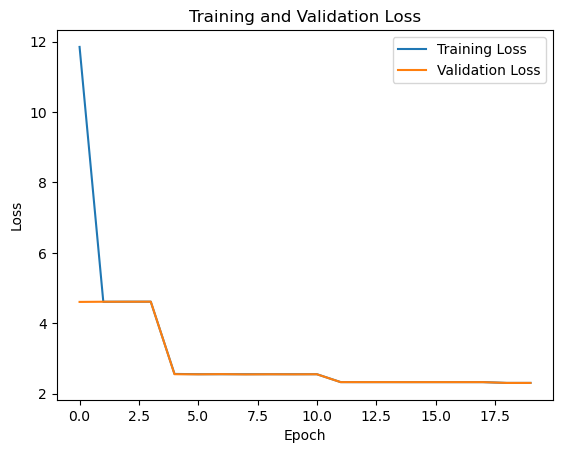

In [84]:
# Plot the training and validation loss 
plt.plot(history2.history['loss'], label='Training Loss') 
plt.plot(history2.history['val_loss'], label='Validation Loss') 
plt.xlabel('Epoch') 
plt.ylabel('Loss') 
plt.legend() 
plt.title('Training and Validation Loss') 
plt.show() 

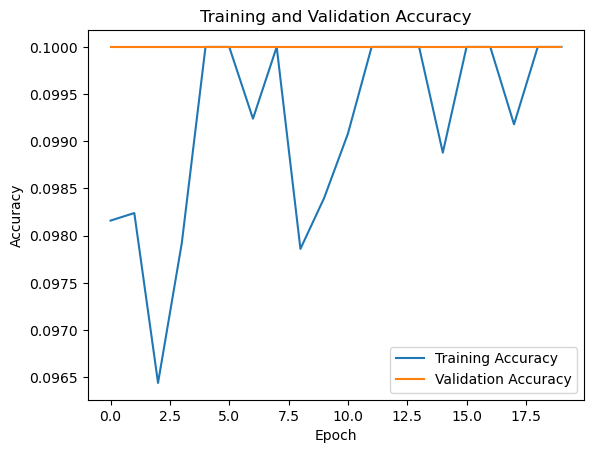

In [86]:
 #Plot the training and validation accuracy 
plt.plot(history2.history['accuracy'], label='Training Accuracy') 
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy') 
plt.xlabel('Epoch') 
plt.ylabel('Accuracy') 
plt.legend() 
plt.title('Training and Validation Accuracy')
plt.show()

In [88]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

In [100]:
## making model 3 with Using Convulation to solve this issue
model3 = Sequential([
    Conv2D(64,(3,3),activation="relu",input_shape=(32,32,3)),
    MaxPooling2D((2,2)),
    Conv2D(32,(3,3),activation="relu",input_shape=(32,32,3)),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation="relu",input_shape=(32,32,3)),
    Flatten(),
    Dense(units=128, activation="relu", kernel_regularizer=l1(0.01)),
    Dropout(0.3),
    Dense(units=64, activation="relu", kernel_regularizer=l1(0.01)),
    Dense(units=10, activation="softmax")
])

model3.summary()

C:\Users\rawat\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 30, 30, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_13 (Flatten)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,858 (698.66 KB)

 Trainable params: 178,858 (698.66 KB)

 Non-trainable params: 0 (0.00 B)

In [102]:
model3.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=["accuracy"])

In [106]:
history3 = model3.fit(train_images,train_labels, 
          validation_data=(test_images,test_labels),
          batch_size=100,epochs=10,
          callbacks=[early_stop])

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 45s 89ms/step - accuracy: 0.3411 - loss: 1.9802 - val_accuracy: 0.3908 - val_loss: 1.9017
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 41s 81ms/step - accuracy: 0.3610 - loss: 1.9564 - val_accuracy: 0.3726 - val_loss: 1.9291
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 41s 81ms/step - accuracy: 0.3720 - loss: 1.9434 - val_accuracy: 0.3662 - val_loss: 1.9208
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 41s 81ms/step - accuracy: 0.3824 - loss: 1.9094 - val_accuracy: 0.4229 - val_loss: 1.8234
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 43s 85ms/step - accuracy: 0.3984 - loss: 1.8796 - val_accuracy: 0.4274 - val_loss: 1.8291
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 43s 86ms/step - accuracy: 0.3997 - loss: 1.8696 - val_accuracy: 0.4191 - val_loss: 1.8224
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 41s 82ms/step - accuracy: 0.4055 - loss: 1.8516 - val_accuracy: 0.4444 - val_loss: 1.7663
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 82s 82ms/step - accuracy: 0.4193 - loss: 1.8221 - 

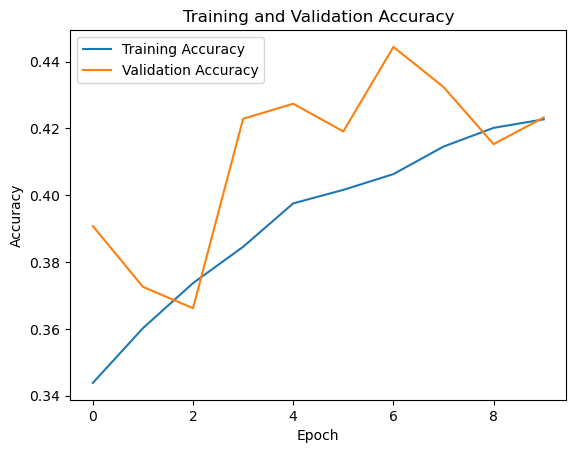

In [108]:
 #Plot the training and validation accuracy 
plt.plot(history3.history['accuracy'], label='Training Accuracy') 
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy') 
plt.xlabel('Epoch') 
plt.ylabel('Accuracy') 
plt.legend() 
plt.title('Training and Validation Accuracy')
plt.show()

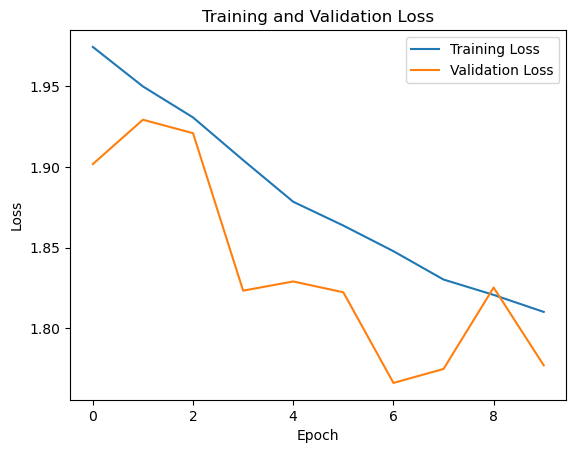

In [109]:
# Plot the training and validation loss 
plt.plot(history3.history['loss'], label='Training Loss') 
plt.plot(history3.history['val_loss'], label='Validation Loss') 
plt.xlabel('Epoch') 
plt.ylabel('Loss') 
plt.legend() 
plt.title('Training and Validation Loss') 
plt.show() 